<a href="https://www.kaggle.com/code/jatinchhabra21/tweet-disaster?scriptVersionId=92137320" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import string
import re
import numpy as np
from nltk import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../input/nlp-getting-started/train.csv")

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
def clean_data(text):
    
    text = text.lower()
    text = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'^#','',text)
    text = re.sub(r'\A@\w*','',text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'_','',text)
    
    return text

In [5]:
df["text"] = df["text"].apply(clean_data) 

In [6]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,ariaahrary thetawniest the out of control wild...,1
7610,10871,NaN,NaN,s of volcano hawaii,1
7611,10872,NaN,NaN,police investigating after an ebike collided w...,1


In [7]:
disaster_list = ["disaster","earthquake","tornado","wildfire","fire","landslide","evacuation","flood","emergency","died","heat","wave","crash","ablaze","injuries","threatening"]

In [8]:
import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet as wn


def tokenize_and_lemmatize(text):
    words = []
    wordlemm = WordNetLemmatizer()
    tokens = list(word_tokenize(text))
    for i in tokens:
        words.append(wordlemm.lemmatize(word = i))
        
    return " ".join(words)

for i in range(df.shape[0]):
    df["text"][i] = tokenize_and_lemmatize(df["text"][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [9]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deed are the reason of this earthquake may...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all resident asked to shelter in place are bei...,1
3,6,NaN,NaN,people receive wildfire evacuation order in ca...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska a sm...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane holding a bridge collapse into...,1
7609,10870,NaN,NaN,ariaahrary thetawniest the out of control wild...,1
7610,10871,NaN,NaN,s of volcano hawaii,1
7611,10872,NaN,NaN,police investigating after an ebike collided w...,1


In [10]:
from nltk.corpus import stopwords

def remove_stopword(text):

    token_words = word_tokenize(text)
    sentence = []
    stopword_set = set(stopwords.words('english'))
    for word in token_words:
        if(word not in stopword_set):
            sentence.append(word)
            
    return " ".join(sentence)

In [11]:
df["text"] = df["text"].apply(remove_stopword)

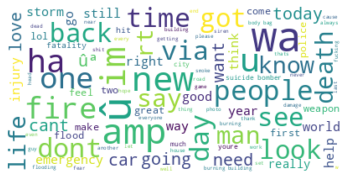

In [12]:
from wordcloud import WordCloud
text = df.iloc[:,3]
wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(text))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english",max_features=15000,min_df=0.00075)
data_cv = cv.fit_transform(df["text"])
x = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
x

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aba,abandoned,abc,ablaze,able,absolutely,abstorm,abuse,access,accident,...,zionist,zombie,zone,ûª,ûªs,ûªt,ûªve,ûïwhen,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y = df["target"]

In [15]:
df_test = pd.read_csv("../input/nlp-getting-started/test.csv")

In [16]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [17]:
df_test["text"] = df_test["text"].apply(clean_data)
df_test["text"] = df_test["text"].apply(tokenize_and_lemmatize)
df_test["text"] = df_test["text"].apply(remove_stopword)

In [18]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different city stay safe ever...
2,3,NaN,NaN,forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfire
4,11,NaN,NaN,typhoon soudelor kill china taiwan
...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles ûò safety faste...
3259,10865,NaN,NaN,storm ri worse last hurricane hardest hit yard...
3260,10868,NaN,NaN,green line derailment chicago
3261,10874,NaN,NaN,meg issue hazardous weather outlook hwo


In [19]:
cv = CountVectorizer(stop_words="english",max_features=15000,min_df=0.00075)
data_cv = cv.fit_transform(df_test["text"])
x_test = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
x_test

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aba,abandoned,abbswinston,abc,ablaze,abomb,absolute,absolutely,abstorm,abuse,...,zouma,ìàekdar,ûª,ûªm,ûªre,ûªs,ûªt,ûïwhen,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
columns = [c for c in x.columns if c not in x_test.columns]

In [21]:
x.drop(columns,inplace=True,axis=1)

In [22]:
columns = [c for c in x_test.columns if c not in x.columns]

In [23]:
x_test.drop(columns,inplace=True,axis=1)

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x,y)

RandomForestClassifier()

In [25]:
y_pred = clf.predict(x_test)

In [26]:
y_train_pred = clf.predict(x)

In [27]:
submission = pd.DataFrame()

In [28]:
submission["id"] = df_test["id"]
submission["target"] = y_pred

In [29]:
submission.to_csv("./submission.csv",index=False)